# Desirability Functions for Multi-Objective Optimization
This notebook demonstrates the use of desirability functions for multi-objective optimization. The desirability function is a scalar function that maps a vector of objective values to a scalar value, most often in the range [0, 1]. The desirability function is used to aggregate multiple objectives into a single objective value, e.g. by the multiplicative Sobo strategy.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from bofire.data_models.objectives import api as objectives_data_model

### Desirability Functions map from the input space to the range [0, 1], also by clipping after the bounds

In [ ]:
objectives = {
    "Increasing": objectives_data_model.IncreasingDesirabilityObjective(
        bounds=(0.0, 5.0)
    ),
    "Decreasing": objectives_data_model.DecreasingDesirabilityObjective(
        bounds=(0.0, 5.0)
    ),
    "Peak": objectives_data_model.PeakDesirabilityObjective(
        bounds=(0.0, 5.0), peak_position=2.5
    ),
    "In-Range": objectives_data_model.InRangeDesirability(bounds=(1.0, 3.0)),
}

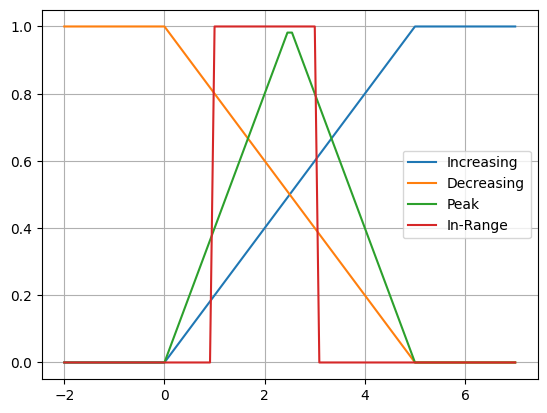

In [ ]:
for key, objective in objectives.items():
    x = np.linspace(-2.0, 7.0, 100)
    y = objective(x, None)
    plt.plot(x, y, label=key)
plt.grid(True)
plt.legend()

### Clipping is optional, but leads to values outside the [0, 1] range

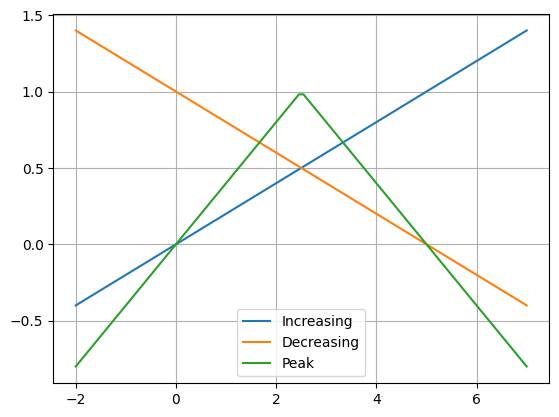

In [ ]:
objectives = {
    "Increasing": objectives_data_model.IncreasingDesirabilityObjective(
        bounds=(0.0, 5.0), clip=False
    ),
    "Decreasing": objectives_data_model.DecreasingDesirabilityObjective(
        bounds=(0.0, 5.0), clip=False
    ),
    "Peak": objectives_data_model.PeakDesirabilityObjective(
        bounds=(0.0, 5.0), peak_position=2.5, clip=False
    ),
}
for key, objective in objectives.items():
    x = np.linspace(-2.0, 7.0, 100)
    y = objective(x, None)
    plt.plot(x, y, label=key)
plt.grid(True)
plt.legend()

### A concave or convex desirability function can be created by setting the `log_shape_factor`

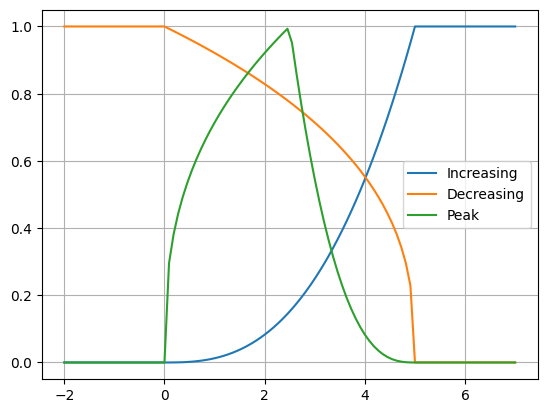

In [ ]:
objectives = {
    "Increasing": objectives_data_model.IncreasingDesirabilityObjective(
        bounds=(0.0, 5.0), log_shape_factor=1.0
    ),
    "Decreasing": objectives_data_model.DecreasingDesirabilityObjective(
        bounds=(0.0, 5.0), log_shape_factor=-1.0
    ),
    "Peak": objectives_data_model.PeakDesirabilityObjective(
        bounds=(0.0, 5.0),
        peak_position=2.5,
        log_shape_factor=-1.0,
        log_shape_factor_decreasing=1.0,
    ),
}
for key, objective in objectives.items():
    x = np.linspace(-2.0, 7.0, 100)
    y = objective(x, None)
    plt.plot(x, y, label=key)
plt.grid(True)
plt.legend()